In [ ]:
import numpy as np
import pandas as pd
import anndata as ad
from pprint import pprint as pp
import custom_func as pc 
import color_map as cc
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import FastICA
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
import umap as um
from sklearn.cluster import HDBSCAN

/opt/anaconda3/envs/mydev/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### OPEN ANNDATA FILE

In [3]:
path = '/Users/maksimsgolubovics/Studienprojekt/Studienprojekt/Study Project/mouse_liver'
adata = ad.read_h5ad(path)
ceentered_df = adata.to_df(layer='centered_study_log_full')
cs_df = ceentered_df.join(adata.obs['time']).reset_index().drop(columns='index').set_index('time').sort_index(ascending=True)

### PCA

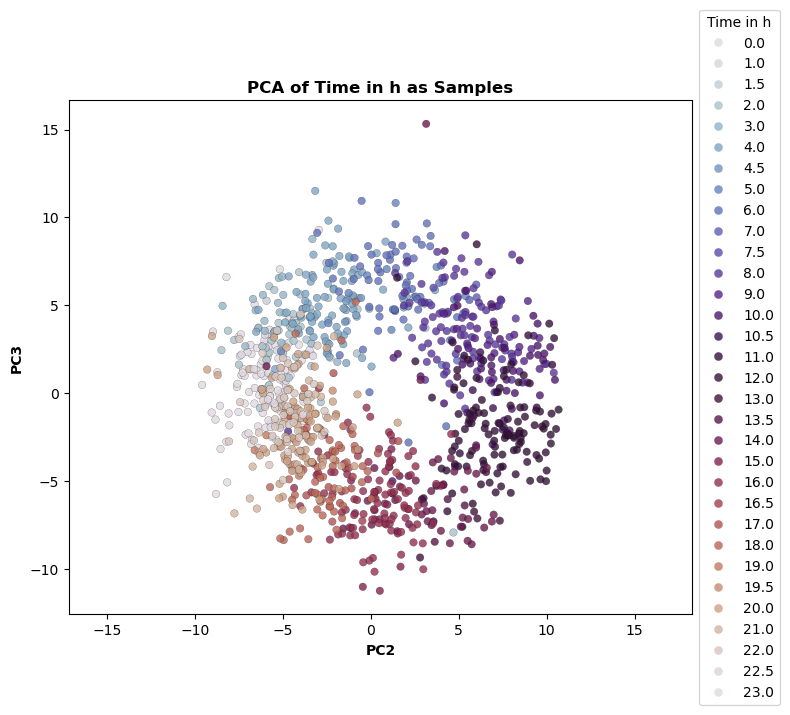

In [9]:
pc.principal_component_2d_timesample(data=cs_df, x=2, y=3, label='Time in h', c_map='twilight')

### TRUNCATED SVD

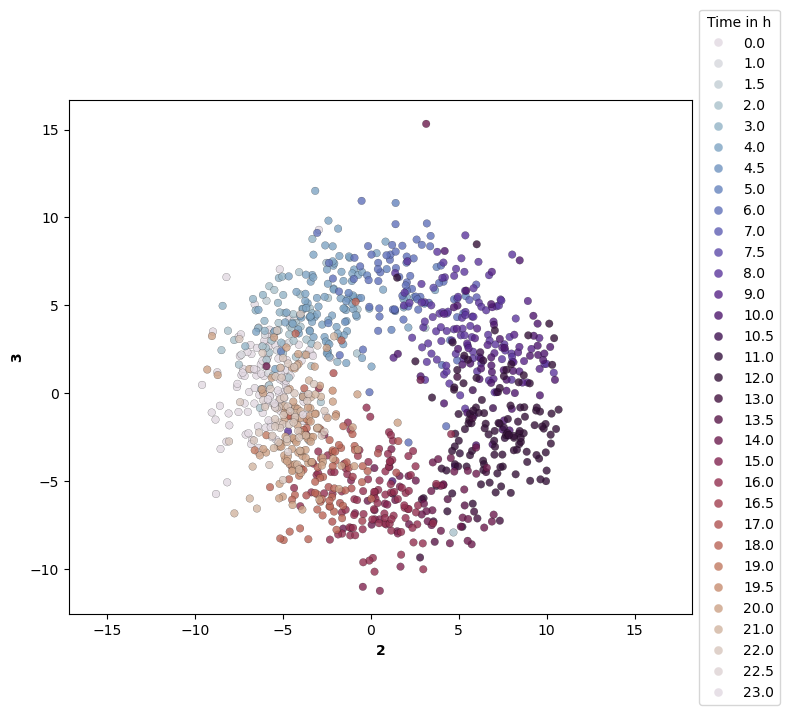

In [15]:
pc.visualization_of_dec_tools_2d(dec=TruncatedSVD(n_components=3), x=2, y=3, data=cs_df, label='Time in h', c_map='twilight')

### FACTOR ANALYSIS

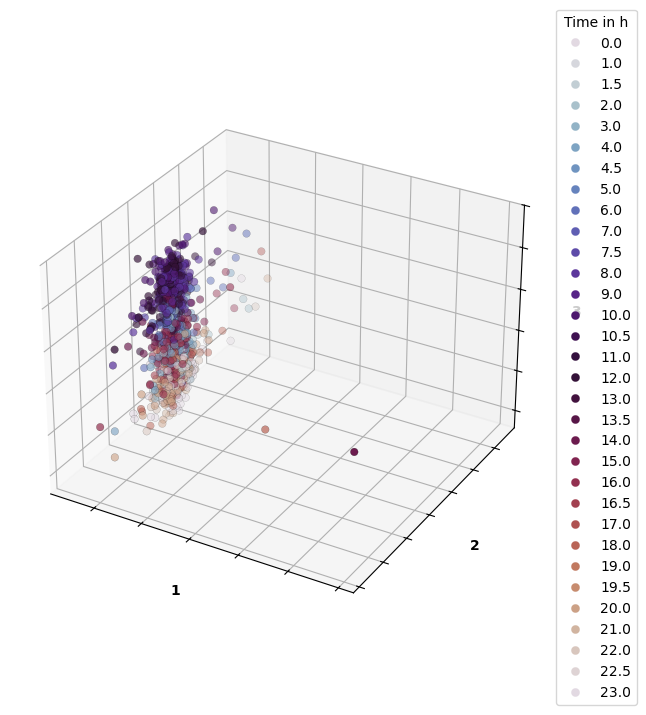

In [16]:
pc.visualization_of_dec_tools_3d(dec=FactorAnalysis(n_components=3), data=cs_df, label='Time in h', c_map='twilight')

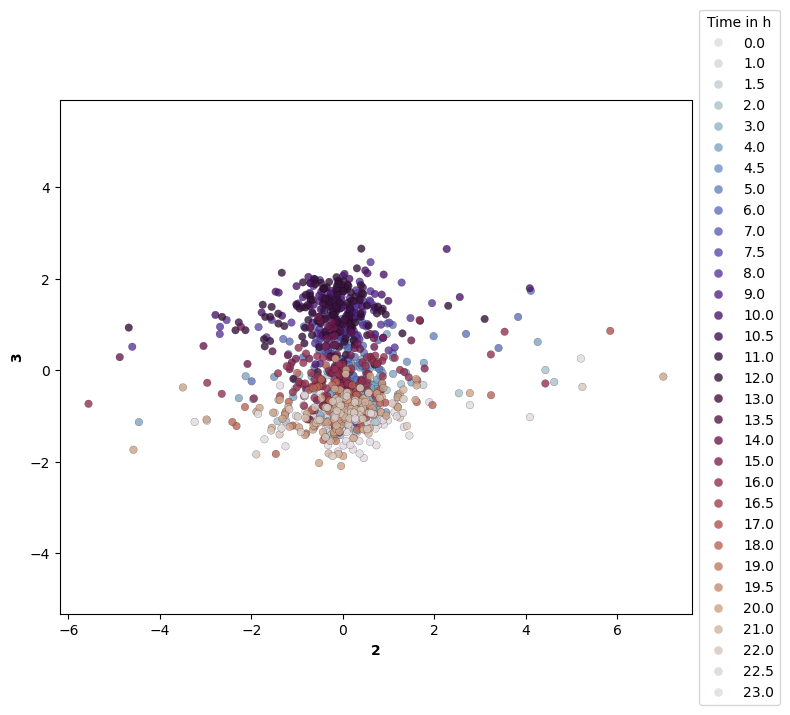

In [13]:
pc.visualization_of_dec_tools_2d(dec=FactorAnalysis(n_components=3), x=2, y=3 , data=cs_df, label='Time in h', c_map='twilight')

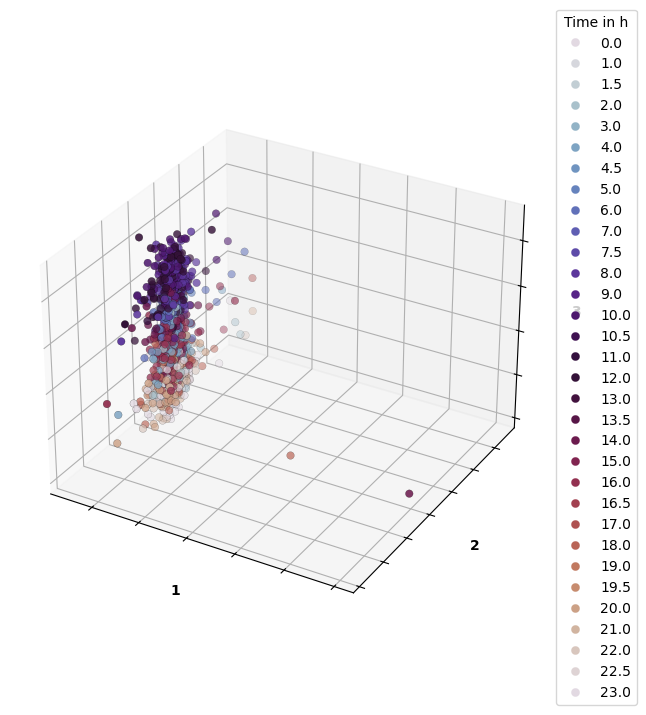

In [17]:
pc.visualization_of_dec_tools_3d(dec=FactorAnalysis(n_components=3, rotation='varimax'), data=cs_df, label='Time in h', c_map='twilight')

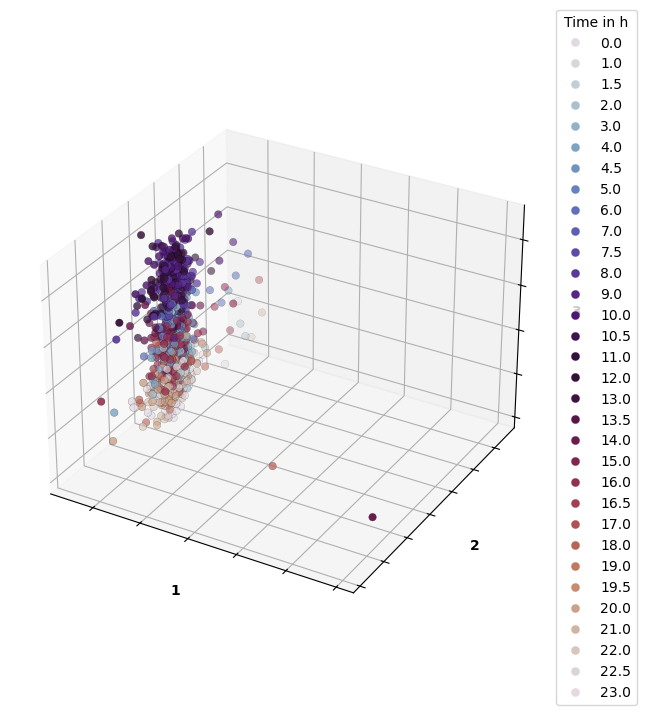

In [18]:
pc.visualization_of_dec_tools_3d(dec=FactorAnalysis(n_components=3, rotation='quartimax'), data=cs_df, label='Time in h', c_map='twilight')

### NMF

In [15]:
cs_df.min().min()
cs_df_pos = cs_df + abs(cs_df.min().min()) + 0.1

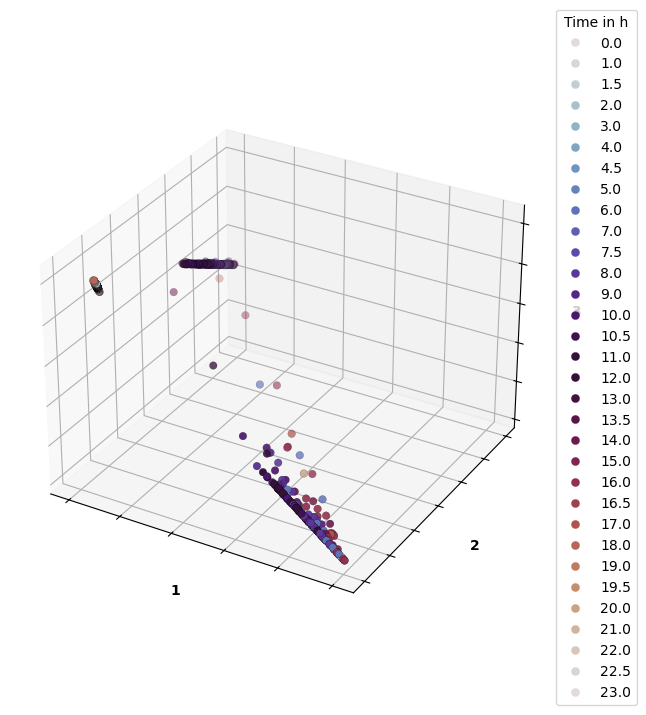

In [27]:
pc.visualization_of_dec_tools_3d(dec=NMF(n_components=3), data=cs_df_pos, label='Time in h', c_map='twilight')

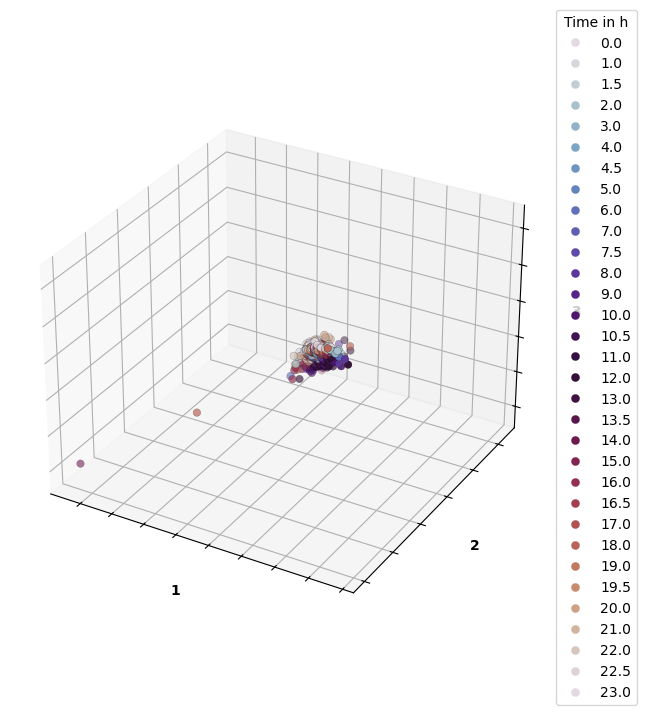

In [28]:
pc.visualization_of_dec_tools_3d(dec=NMF(n_components=3, solver='mu'), data=cs_df_pos, label='Time in h', c_map='twilight')

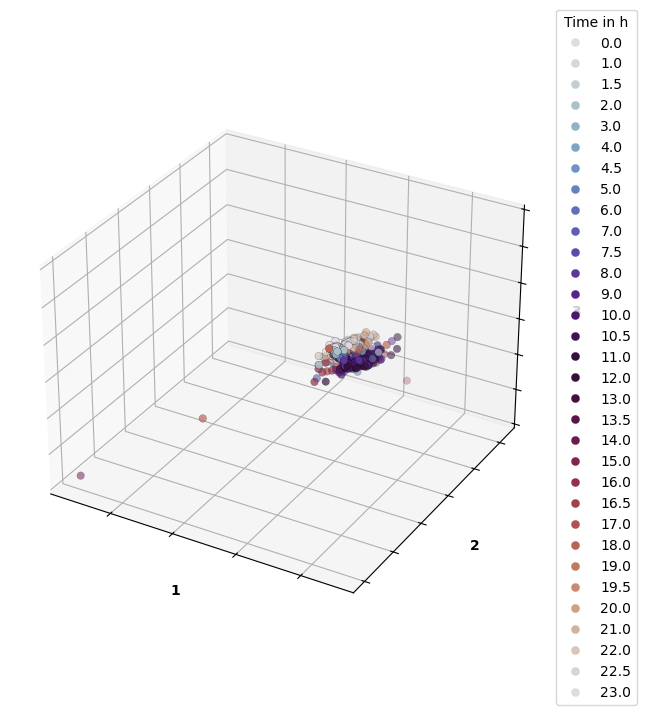

In [29]:
pc.visualization_of_dec_tools_3d(dec=NMF(n_components=3, solver='mu', beta_loss='itakura-saito'), data=cs_df_pos, label='Time in h', c_map='twilight')

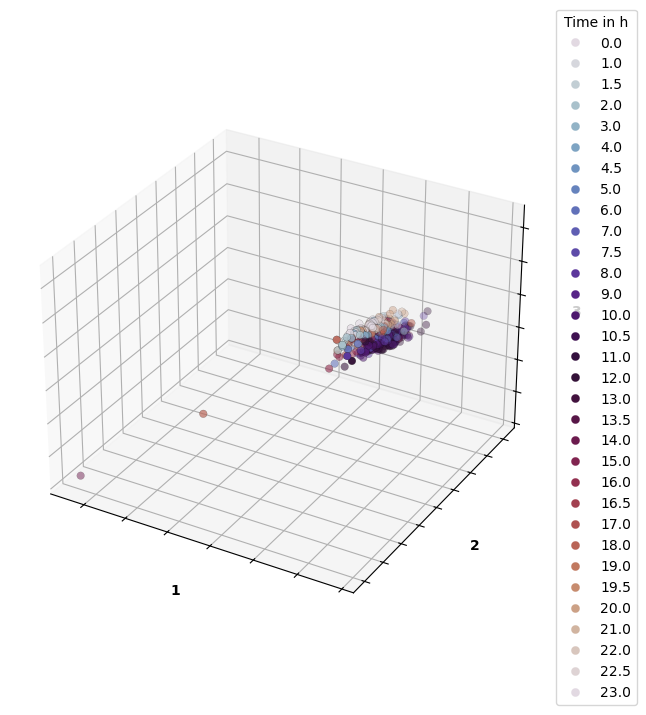

In [30]:
pc.visualization_of_dec_tools_3d(dec=NMF(n_components=3, solver='mu', beta_loss='kullback-leibler'), data=cs_df_pos, label='Time in h', c_map='twilight')

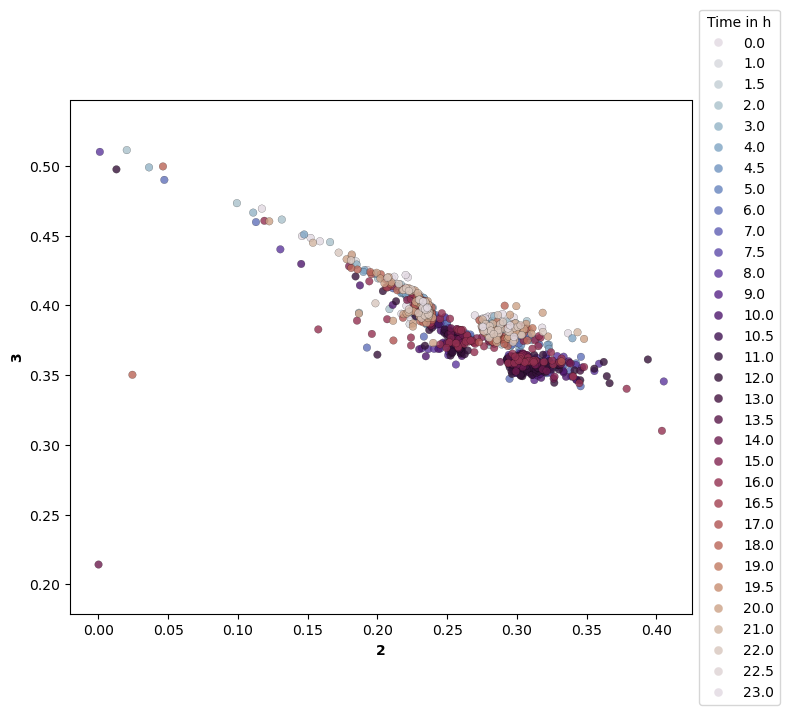

In [16]:
pc.visualization_of_dec_tools_2d(dec=NMF(n_components=3, solver='mu', beta_loss='kullback-leibler'),x=2, y=3 , data=cs_df_pos, label='Time in h', c_map='twilight')

### T-SNE

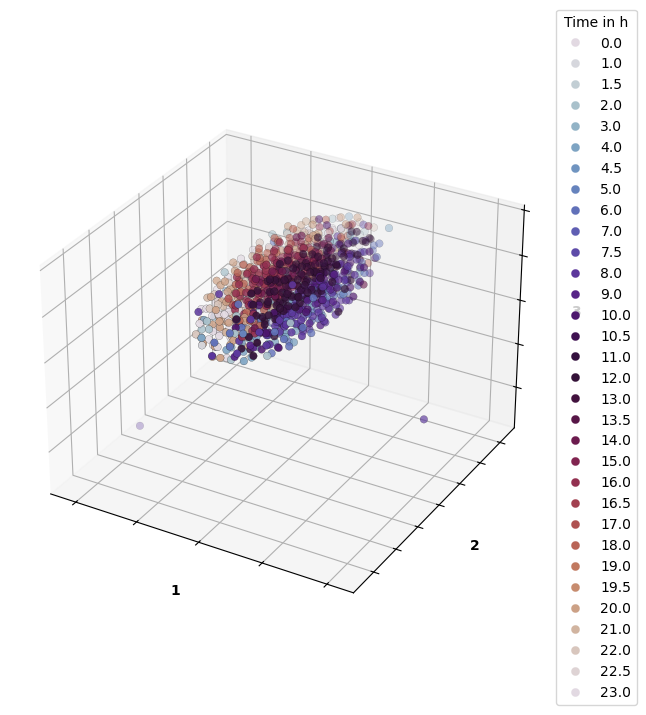

In [34]:
pc.visualization_of_dec_tools_3d(dec=TSNE(n_components=3, random_state= 32, perplexity=5), data=cs_df, label='Time in h', c_map='twilight')

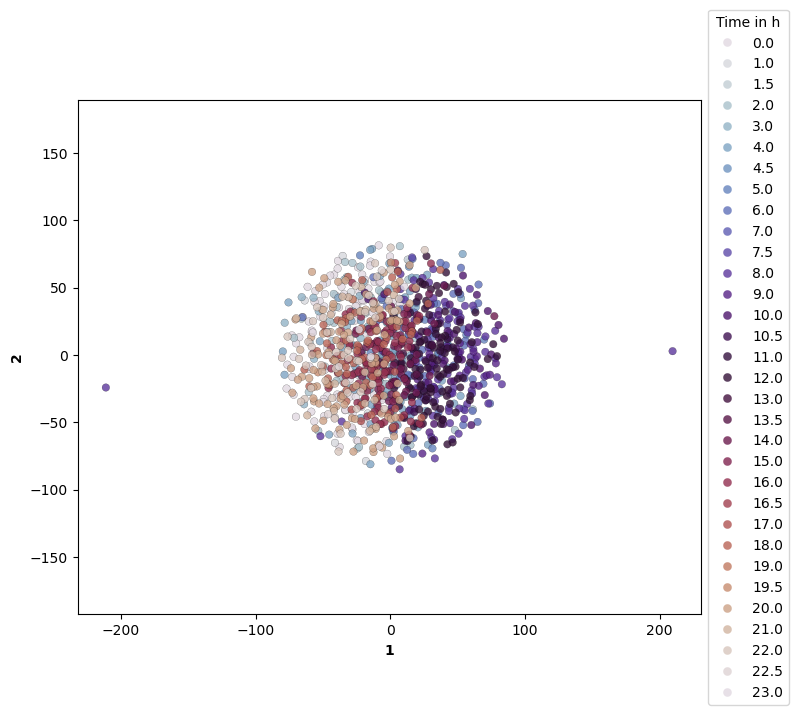

In [17]:
pc.visualization_of_dec_tools_2d(dec=TSNE(n_components=3, random_state= 32, perplexity=5), data=cs_df, label='Time in h', c_map='twilight')

### FASTICA

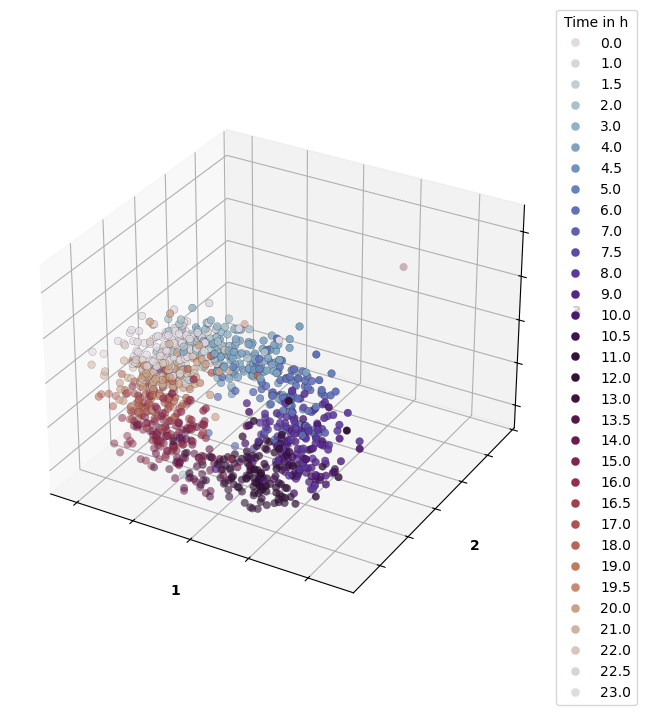

In [ ]:
pc.visualization_of_dec_tools_3d(dec=FastICA(n_components=3), data=cs_df, label='Time in h', c_map='twilight')

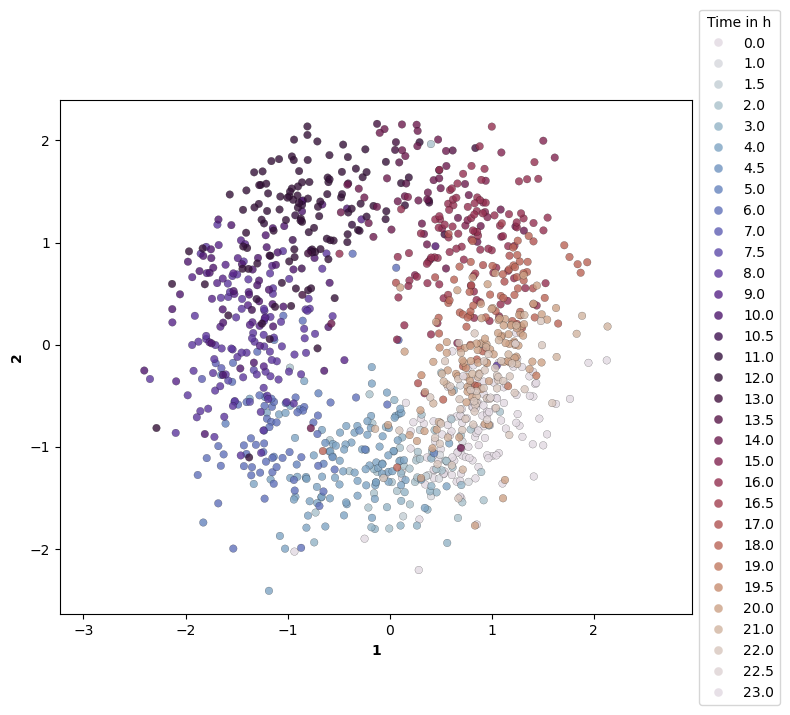

In [20]:
pc.visualization_of_dec_tools_2d(dec=FastICA(n_components=3), data=cs_df, label='Time in h', c_map='twilight')

### UMAP

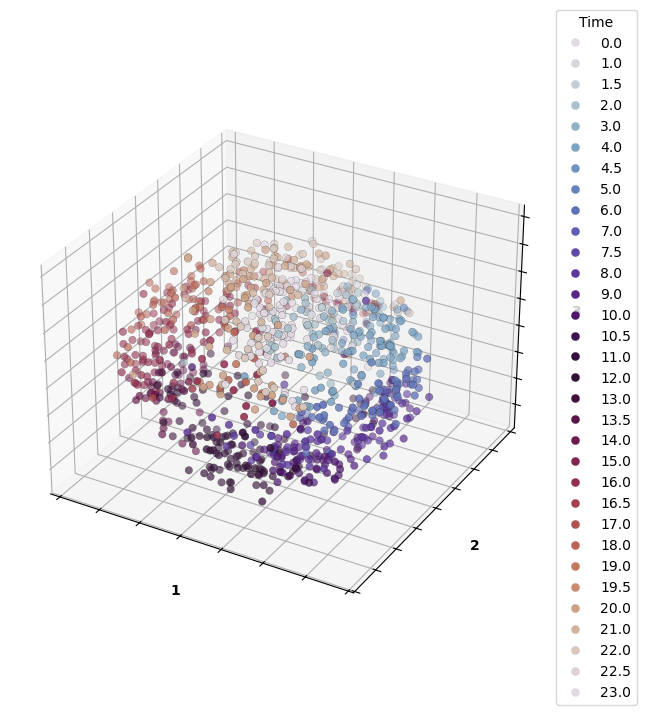

In [36]:
pc.visualization_of_dec_tools_3d(dec=um.UMAP(n_components=3, min_dist=0.0, n_neighbors=15, n_jobs=-1), data=cs_df, label='Time', c_map='twilight')

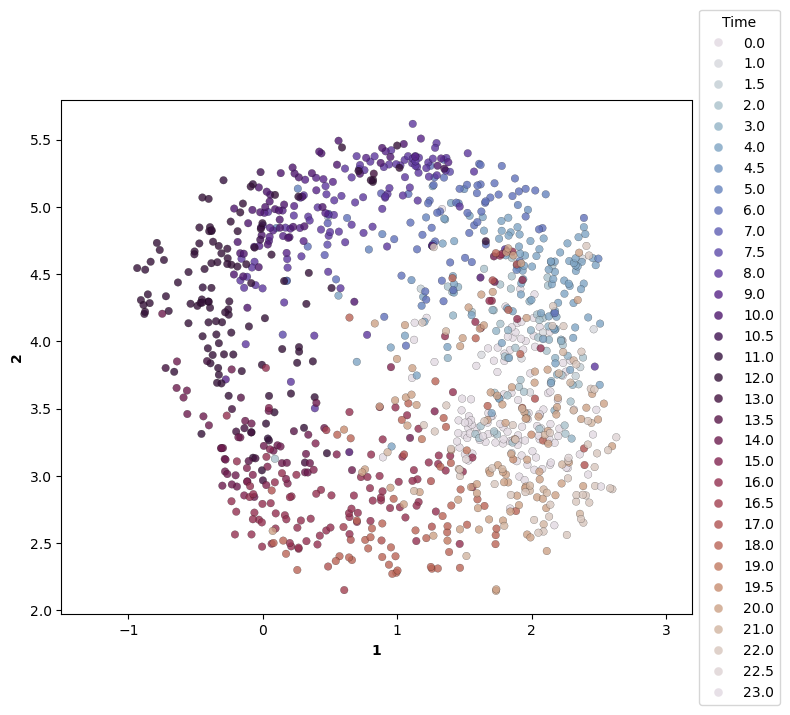

In [21]:
pc.visualization_of_dec_tools_2d(dec=um.UMAP(n_components=3, min_dist=0.0, n_neighbors=15, n_jobs=-1), data=cs_df, label='Time', c_map='twilight')

In [37]:
adata

AnnData object with n_obs × n_vars = 1096 × 40614
    obs: 'study', 'time', 'outlier', 'Sex', 'Light', 'Age (weeks)', 'Sequencing Type', 'Inferred Sequencing Type', 'Note'
    var: 'Symbol'
    obsm: 'centered_study_log_full', 'centered_study_log_full_pydeseq2', 'centered_study_log_small', 'small_reduction'
    layers: 'centered_study_log_full', 'centered_study_log_full_pydeseq2', 'deseq2_norm', 'log_trasformed', 'log_trasformed_deseq2', 'not_normalized'

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61]
      ENSMUSG00000087193  ENSMUSG00000039545  ENSMUSG00000085599  \
time                                                               
0.0            -1.000000           -0.721194           -0.933447   
0.0            -1.000000           -0.919803           -1.000000   
0.0            -1.000000           -0.886953           -1.000000   
0.0            -0.939861           -0.728337            0.233811   
0.0            -1.000000           -0.638686           -1.000000   
...                  ...                 ...                 ...   
23.0           -1.000000           -0.936123           -1.000000   
23.0           -1.000000           -0.969137           -1.000000   
23.0           -1.000000           -1.000000            0.536590   
23.0           -1.000000           -0.350605            0.7

/var/folders/3g/z5c6jlkn4dg5mg5rrpmsrmb80000gn/T/ipykernel_38035/768263660.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cs_df_r_time['clusters'] = clusters.copy()


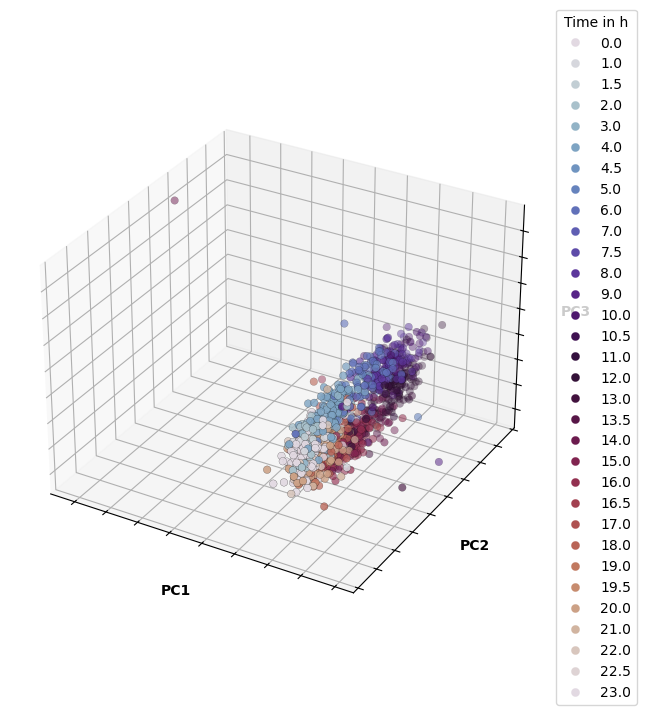

In [41]:
cs_df_r_time = adata.to_df(layer='log_trasformed').join(adata.obs['time']).reset_index().drop(columns='index').set_index('time').sort_index(ascending=True)

umap = um.UMAP(n_components=10, min_dist=0.0)
X_umap = umap.fit_transform(cs_df_r_time)
hdbscan = HDBSCAN(n_jobs=-1)
clusters = hdbscan.fit_predict(X_umap)
print(np.unique(clusters))
cs_df_r_time['clusters'] = clusters.copy()
print(cs_df_r_time)
residual = pc.residual(data=cs_df_r_time, columns=['clusters'])
pc.principal_component_3d_timesample(data=residual, label='Time in h', c_map='twilight')

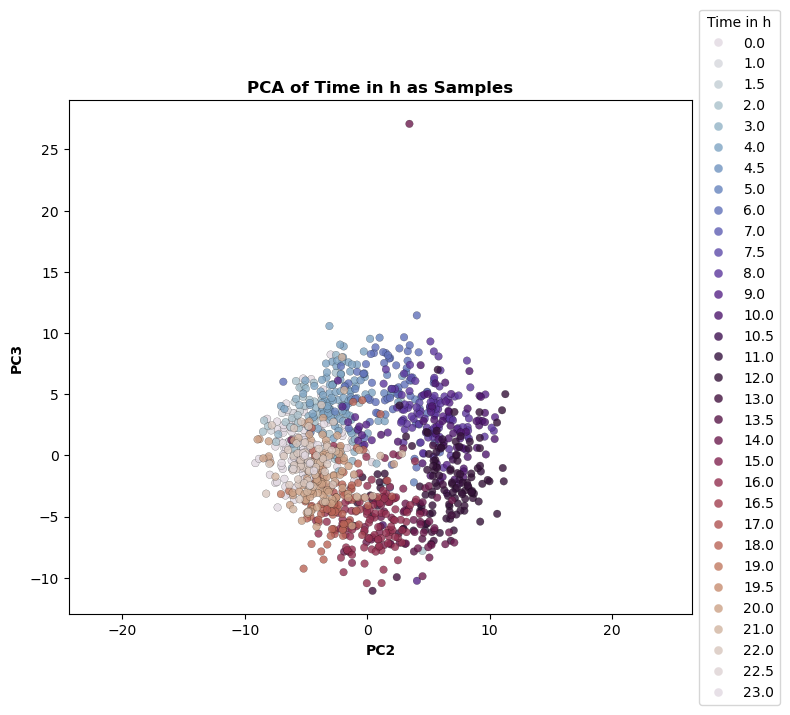

In [47]:
pc.principal_component_2d_timesample(data=residual, label='Time in h', x=2, y=3, c_map='twilight')